In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Pokemon dataset
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Select features for clustering
features_for_clustering = ['HP', 'Attack', 'Defense', 'Speed']

# Standardize the features for clustering
scaler = StandardScaler()
pokemon_data_scaled = scaler.fit_transform(pokemon_data[features_for_clustering])

# Choose the number of clusters (k) using the elbow method or domain knowledge




k = 4
n_init = 10  # Specify the number of times the algorithm will be run with different centroid seeds
kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=42)
pokemon_data['Cluster'] = kmeans.fit_predict(pokemon_data_scaled)


# Select features for KNN classification
features_for_classification = ['Cluster', 'HP', 'Attack', 'Defense', 'Speed']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    pokemon_data[features_for_classification],
    pokemon_data['Legendary'],
    test_size=0.2,
    random_state=42
)

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors (k) as needed

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.925


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

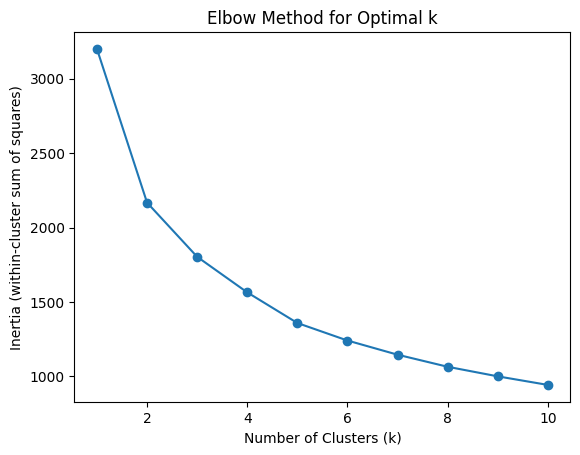

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


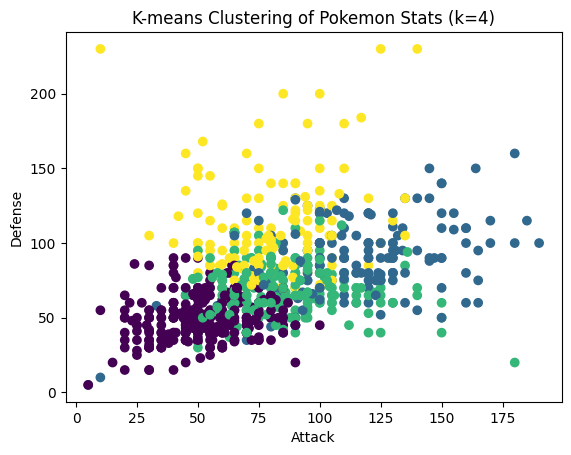

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Pokemon dataset
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Select features for clustering
features_for_clustering = ['HP', 'Attack', 'Defense', 'Speed']

# Standardize the features for clustering
scaler = StandardScaler()
pokemon_data_scaled = scaler.fit_transform(pokemon_data[features_for_clustering])

# Use the elbow method to find the optimal number of clusters (k)
inertia_values = []
possible_k_values = range(1, 11)  # You can adjust the range based on your requirements

for k_value in possible_k_values:
    kmeans = KMeans(n_clusters=k_value, random_state=42)
    kmeans.fit(pokemon_data_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(possible_k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.show()

# Choose the optimal number of clusters based on the elbow method (e.g., k=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
pokemon_data['Cluster'] = kmeans.fit_predict(pokemon_data_scaled)

# Visualize the clusters
plt.scatter(pokemon_data['Attack'], pokemon_data['Defense'], c=pokemon_data['Cluster'], cmap='viridis')
plt.title(f'K-means Clustering of Pokemon Stats (k={optimal_k})')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()


In [18]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load your Pokemon dataset (replace 'your_dataset.csv' with the actual file name)
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Assuming 'Legendary' is the label column, and other columns are features
X = pokemon_data.drop(['Legendary', 'Name', 'Type 1', 'Type 2'], axis=1)  # Exclude 'Name', 'Type 1', and 'Type 2' columns
y = pokemon_data['Legendary']  # Labels

# Check if 'Type 1' is referred to as 'Type'
if 'Type' in X.columns:
    # One-hot encode categorical columns
    X = pd.get_dummies(X, columns=['Type'])

    # Label Encoding for categorical labels
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Feature Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define the parameter grid
    param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

    # Create an SVM model
    svm_model = SVC()

    # Create the GridSearchCV object
    grid_search = GridSearchCV(svm_model, param_grid, cv=5)
    grid_search.fit(X_train_scaled, y_train)

    # Get the best hyperparameters and the best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Print the best hyperparameters
    print("\nBest Hyperparameters:")
    print(best_params)

    # Use the best model for predictions
    y_pred = best_model.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy: {accuracy}")

    # Additional Metrics
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

else:
    print("The 'Type' column is not present in the dataset.")


The 'Type' column is not present in the dataset.


In [19]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load your Pokemon dataset (replace 'your_dataset.csv' with the actual file name)
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Assuming 'Legendary' is the label column, and other columns are features
X = pokemon_data.drop(['Legendary', 'Name', 'Type 1', 'Type 2'], axis=1)  # Exclude 'Name', 'Type 1', and 'Type 2' columns
y = pokemon_data['Legendary']  # Labels

# Label Encoding for categorical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Create an SVM model
svm_model = SVC()

# Create the GridSearchCV object
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("\nBest Hyperparameters:")
print(best_params)

# Use the best model for predictions
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy}")

# Additional Metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Best Hyperparameters:
{'C': 10, 'kernel': 'linear'}

Accuracy: 0.975

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       150
           1       0.71      1.00      0.83        10

    accuracy                           0.97       160
   macro avg       0.86      0.99      0.91       160
weighted avg       0.98      0.97      0.98       160



In [20]:
pip install seaborn


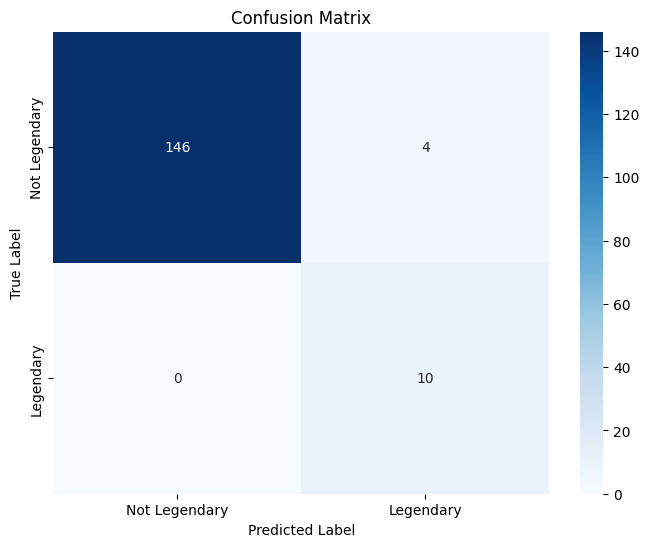

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Legendary", "Legendary"],
            yticklabels=["Not Legendary", "Legendary"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load your Pokemon dataset (replace 'your_dataset.csv' with the actual file name)
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Assuming 'Legendary' is the label column, and other columns are features
X = pokemon_data[['HP', 'Attack', 'Defense', 'Speed']]
y = pokemon_data['Legendary']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans to cluster the data
kmeans = KMeans(n_clusters=3, random_state=42)
pokemon_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use KNN within each cluster for classification
for cluster_id in pokemon_data['Cluster'].unique():
    # Filter data for the current cluster
    cluster_data = pokemon_data[pokemon_data['Cluster'] == cluster_id]

    # Extract features and labels for the cluster
    X_cluster = cluster_data[['HP', 'Attack', 'Defense', 'Speed']]
    y_cluster = cluster_data['Legendary']

    # Split the cluster data into training and testing sets
    X_cluster_train, X_cluster_test, y_cluster_train, y_cluster_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    # Apply KNN for classification within the cluster
    knn_classifier = KNeighborsClassifier(n_neighbors=5)
    knn_classifier.fit(X_cluster_train, y_cluster_train)

    # Make predictions on the test set within the cluster
    y_cluster_pred = knn_classifier.predict(X_cluster_test)

    # Evaluate the KNN model within the cluster
    accuracy_cluster = accuracy_score(y_cluster_test, y_cluster_pred)
    print(f"Accuracy for Cluster {cluster_id}: {accuracy_cluster}")
    print(f"Classification Report for Cluster {cluster_id}:\n{classification_report(y_cluster_test, y_cluster_pred)}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy for Cluster 0: 1.0
Classification Report for Cluster 0:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        66

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66

Accuracy for Cluster 1: 0.85
Classification Report for Cluster 1:
              precision    recall  f1-score   support

       False       0.90      0.92      0.91        49
        True       0.60      0.55      0.57        11

    accuracy                           0.85        60
   macro avg       0.75      0.73      0.74        60
weighted avg       0.85      0.85      0.85        60

Accuracy for Cluster 2: 0.9714285714285714
Classification Report for Cluster 2:
              precision    recall  f1-score   support

       False       1.00      0.97      0.99        35
        True       0.00      0.00      0.00         0

    accuracy             

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


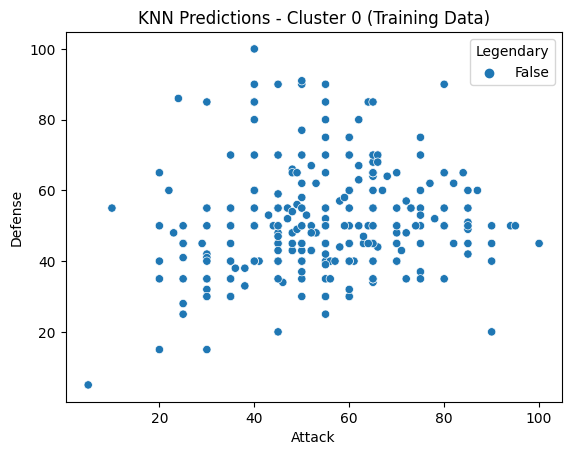

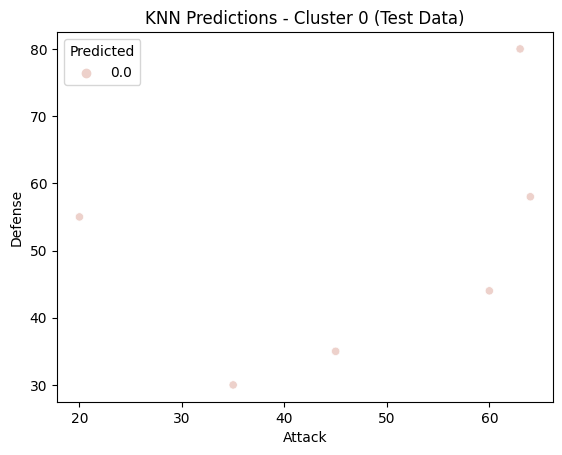

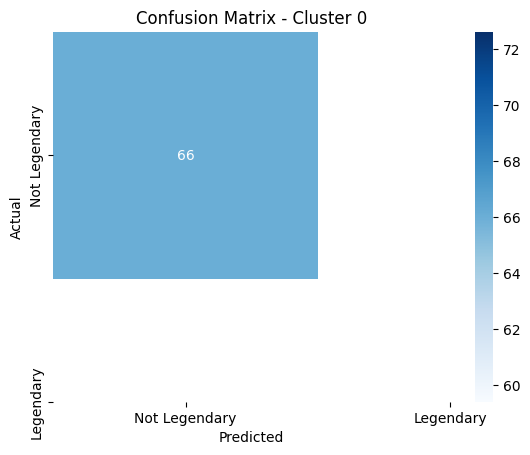

Best Hyperparameters for Cluster 0: {'n_neighbors': 3, 'weights': 'uniform'}
Accuracy for Cluster 0: 1.0
Classification Report for Cluster 0:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        66

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



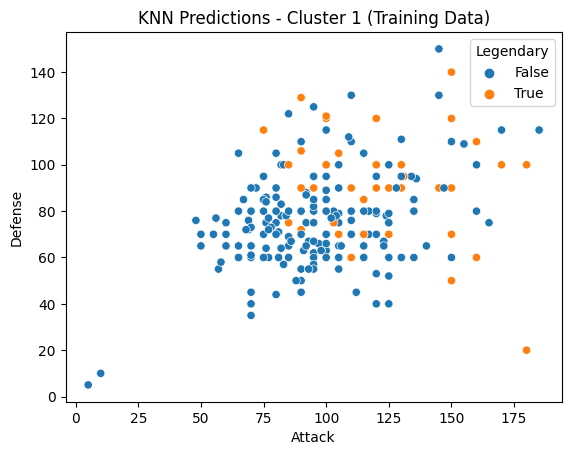

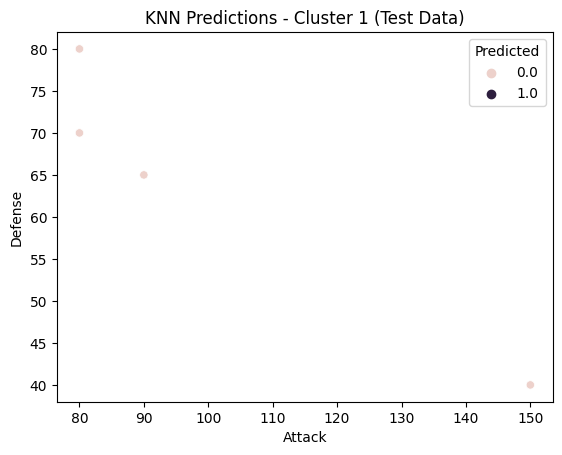

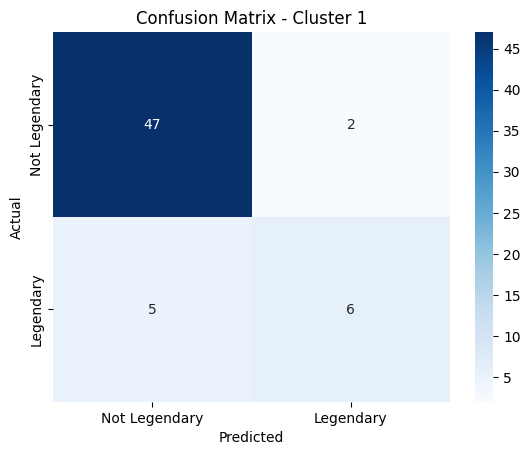

Best Hyperparameters for Cluster 1: {'n_neighbors': 7, 'weights': 'distance'}
Accuracy for Cluster 1: 0.8833333333333333
Classification Report for Cluster 1:
              precision    recall  f1-score   support

       False       0.90      0.96      0.93        49
        True       0.75      0.55      0.63        11

    accuracy                           0.88        60
   macro avg       0.83      0.75      0.78        60
weighted avg       0.88      0.88      0.88        60



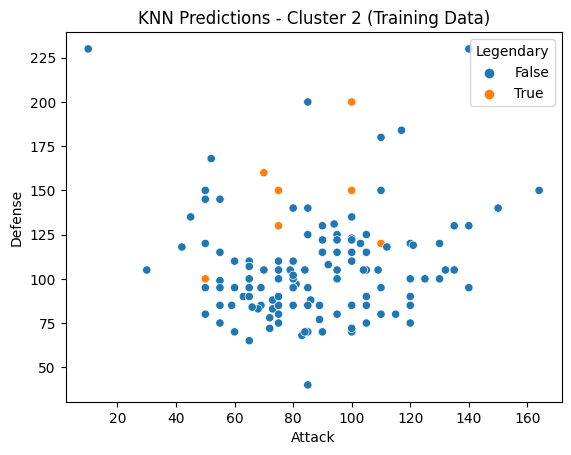

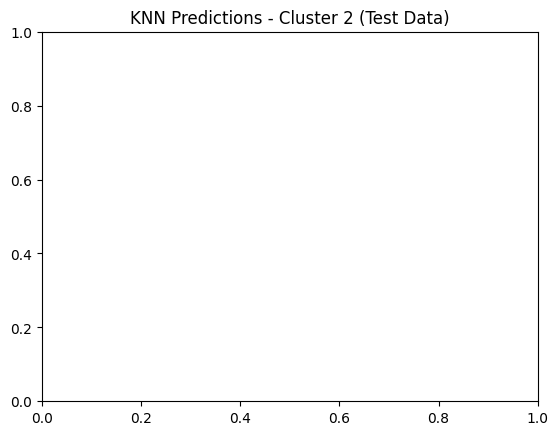

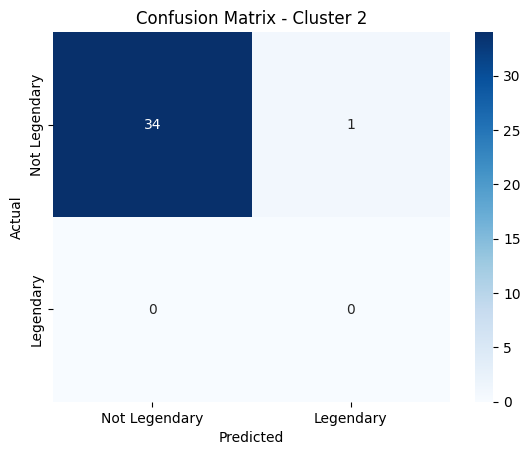

Best Hyperparameters for Cluster 2: {'n_neighbors': 5, 'weights': 'uniform'}
Accuracy for Cluster 2: 0.9714285714285714
Classification Report for Cluster 2:
              precision    recall  f1-score   support

       False       1.00      0.97      0.99        35
        True       0.00      0.00      0.00         0

    accuracy                           0.97        35
   macro avg       0.50      0.49      0.49        35
weighted avg       1.00      0.97      0.99        35



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your Pokemon dataset (replace 'your_dataset.csv' with the actual file name)
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Assuming 'Legendary' is the label column, and other columns are features
X = pokemon_data[['HP', 'Attack', 'Defense', 'Speed']]
y = pokemon_data['Legendary']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans to cluster the data
kmeans = KMeans(n_clusters=3, random_state=42)
pokemon_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Use KNN within each cluster for classification
for cluster_id in pokemon_data['Cluster'].unique():
    # Filter data for the current cluster
    cluster_data = pokemon_data[pokemon_data['Cluster'] == cluster_id]

    # Extract features and labels for the cluster
    X_cluster = cluster_data[['HP', 'Attack', 'Defense', 'Speed']]
    y_cluster = cluster_data['Legendary']

    # Split the cluster data into training and testing sets
    X_cluster_train, X_cluster_test, y_cluster_train, y_cluster_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    # Hyperparameter tuning using GridSearchCV for KNN
    param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
    knn_classifier = KNeighborsClassifier()
    grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)
    grid_search.fit(X_cluster_train, y_cluster_train)

    # Get the best hyperparameters and the best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Make predictions on the test set within the cluster
    y_cluster_pred = best_model.predict(X_cluster_test)

# Visualize KNN predictions for training data within the cluster
    plt.figure()
    sns.scatterplot(x='Attack', y='Defense', hue='Legendary', data=pd.concat([X_cluster_train, pd.Series(y_cluster_train, name='Legendary')], axis=1))
    plt.title(f'KNN Predictions - Cluster {cluster_id} (Training Data)')
    plt.show()

# Visualize KNN predictions for test data within the cluster
    plt.figure()
    sns.scatterplot(x='Attack', y='Defense', hue='Predicted', data=pd.concat([X_cluster_test, pd.Series(y_cluster_pred, name='Predicted')], axis=1))
    plt.title(f'KNN Predictions - Cluster {cluster_id} (Test Data)')
    plt.show()


    # Confusion Matrix for the cluster
    conf_matrix_cluster = confusion_matrix(y_cluster_test, y_cluster_pred)
    plt.figure()
    sns.heatmap(conf_matrix_cluster, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Legendary', 'Legendary'], yticklabels=['Not Legendary', 'Legendary'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Cluster {cluster_id}')
    plt.show()

    # Evaluate the KNN model within the cluster
    accuracy_cluster = accuracy_score(y_cluster_test, y_cluster_pred)
    print(f"Best Hyperparameters for Cluster {cluster_id}: {best_params}")
    print(f"Accuracy for Cluster {cluster_id}: {accuracy_cluster}")
    print(f"Classification Report for Cluster {cluster_id}:\n{classification_report(y_cluster_test, y_cluster_pred)}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


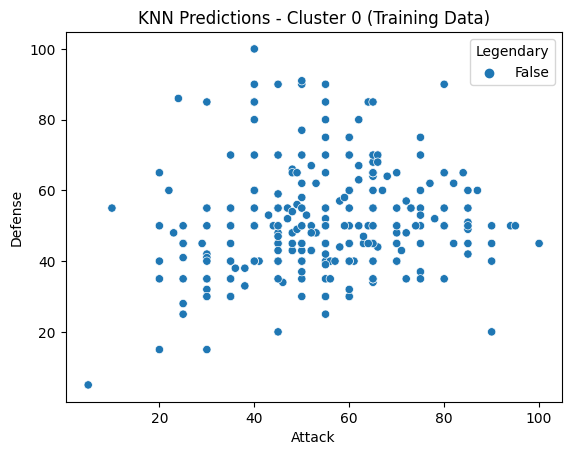

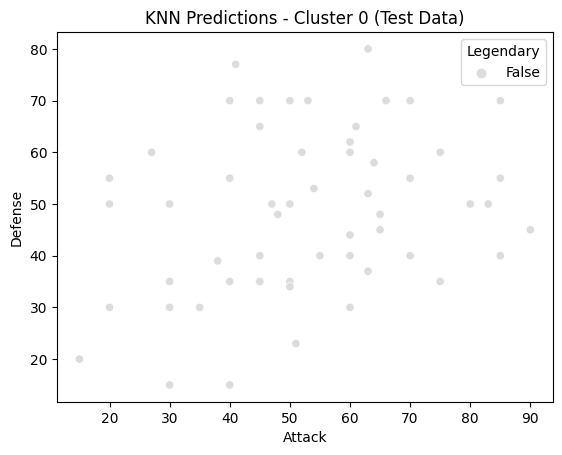

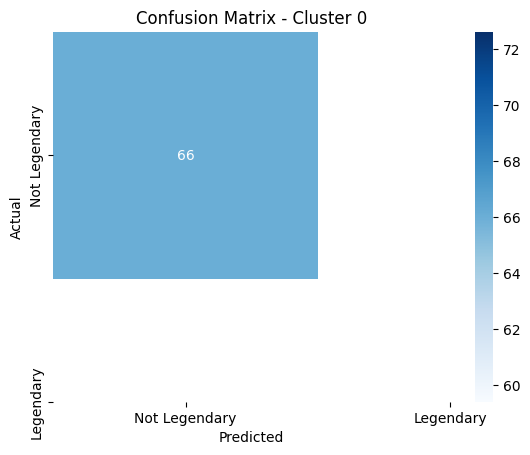

Best Hyperparameters for Cluster 0: {'n_neighbors': 3, 'weights': 'uniform'}
Accuracy for Cluster 0: 1.0
Classification Report for Cluster 0:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        66

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



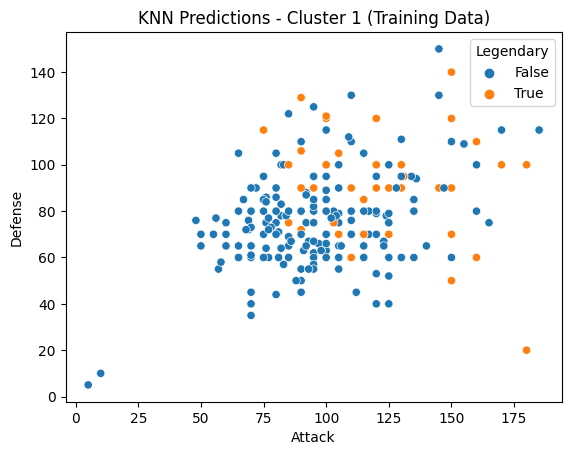

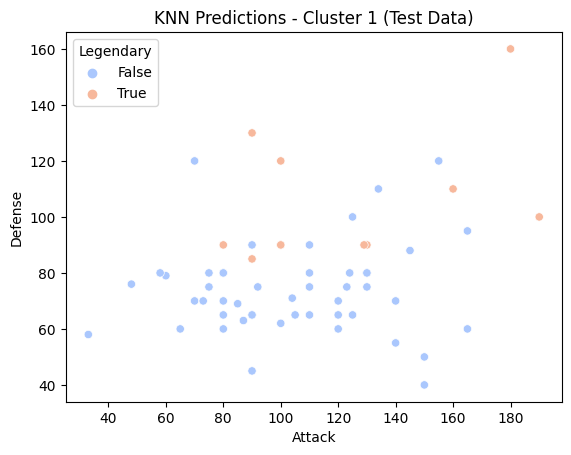

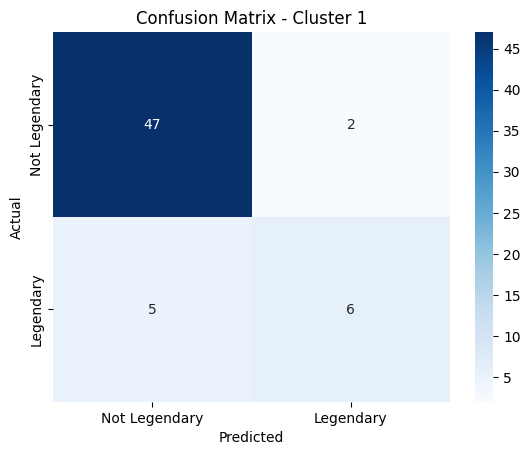

Best Hyperparameters for Cluster 1: {'n_neighbors': 7, 'weights': 'distance'}
Accuracy for Cluster 1: 0.8833333333333333
Classification Report for Cluster 1:
              precision    recall  f1-score   support

       False       0.90      0.96      0.93        49
        True       0.75      0.55      0.63        11

    accuracy                           0.88        60
   macro avg       0.83      0.75      0.78        60
weighted avg       0.88      0.88      0.88        60



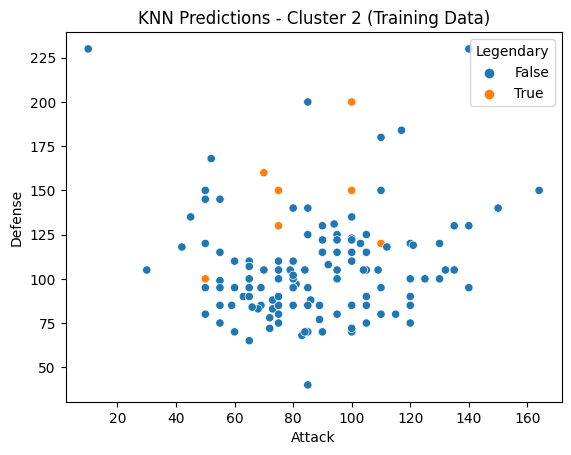

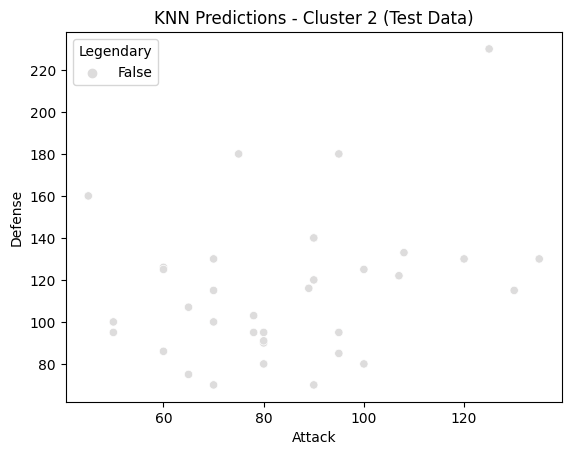

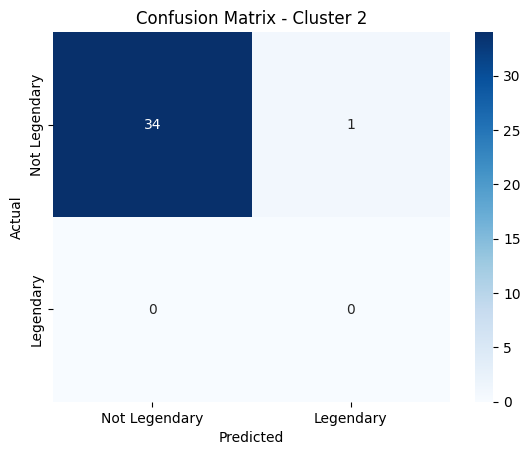

Best Hyperparameters for Cluster 2: {'n_neighbors': 5, 'weights': 'uniform'}
Accuracy for Cluster 2: 0.9714285714285714
Classification Report for Cluster 2:
              precision    recall  f1-score   support

       False       1.00      0.97      0.99        35
        True       0.00      0.00      0.00         0

    accuracy                           0.97        35
   macro avg       0.50      0.49      0.49        35
weighted avg       1.00      0.97      0.99        35



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your Pokemon dataset (replace 'your_dataset.csv' with the actual file name)
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Assuming 'Legendary' is the label column, and other columns are features
X = pokemon_data[['HP', 'Attack', 'Defense', 'Speed']]
y = pokemon_data['Legendary']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans to cluster the data
kmeans = KMeans(n_clusters=3, random_state=42)
pokemon_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Use KNN within each cluster for classification
for cluster_id in pokemon_data['Cluster'].unique():
    # Filter data for the current cluster
    cluster_data = pokemon_data[pokemon_data['Cluster'] == cluster_id]

    # Extract features and labels for the cluster
    X_cluster = cluster_data[['HP', 'Attack', 'Defense', 'Speed']]
    y_cluster = cluster_data['Legendary']

    # Split the cluster data into training and testing sets
    X_cluster_train, X_cluster_test, y_cluster_train, y_cluster_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    # Hyperparameter tuning using GridSearchCV for KNN
    param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
    knn_classifier = KNeighborsClassifier()
    grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)
    grid_search.fit(X_cluster_train, y_cluster_train)

    # Get the best hyperparameters and the best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Make predictions on the test set within the cluster
    y_cluster_pred = best_model.predict(X_cluster_test)

    # Visualize KNN predictions for training data within the cluster
    plt.figure()
    sns.scatterplot(x='Attack', y='Defense', hue='Legendary', data=pd.concat([X_cluster_train, pd.Series(y_cluster_train, name='Legendary')], axis=1))
    plt.title(f'KNN Predictions - Cluster {cluster_id} (Training Data)')
    plt.show()

    # Visualize KNN predictions for test data within the cluster
    plt.figure()
    sns.scatterplot(x='Attack', y='Defense', hue='Legendary', data=pd.concat([X_cluster_test, pd.Series(y_cluster_test, name='Legendary')], axis=1), palette='coolwarm')
    plt.title(f'KNN Predictions - Cluster {cluster_id} (Test Data)')
    plt.show()

    # Confusion Matrix for the cluster
    conf_matrix_cluster = confusion_matrix(y_cluster_test, y_cluster_pred)
    plt.figure()
    sns.heatmap(conf_matrix_cluster, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Legendary', 'Legendary'], yticklabels=['Not Legendary', 'Legendary'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Cluster {cluster_id}')
    plt.show()

    # Evaluate the KNN model within the cluster
    accuracy_cluster = accuracy_score(y_cluster_test, y_cluster_pred)
    print(f"Best Hyperparameters for Cluster {cluster_id}: {best_params}")
    print(f"Accuracy for Cluster {cluster_id}: {accuracy_cluster}")
    print(f"Classification Report for Cluster {cluster_id}:\n{classification_report(y_cluster_test, y_cluster_pred)}")


In [11]:
pip install -U scikit-fuzzy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=21e84b8f31710a3605f3d7e8466ffb923741b43bb0bf365813bcc13d5a6031e1
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


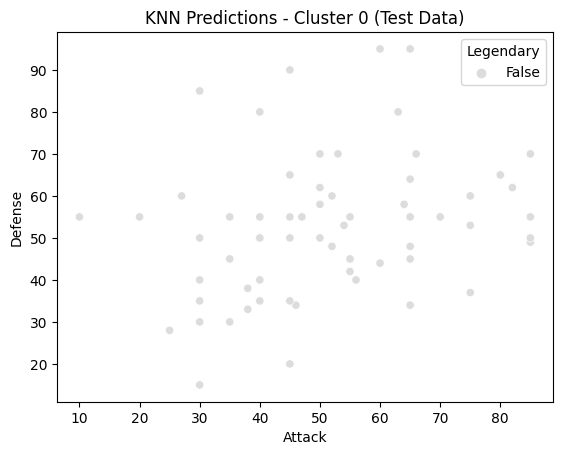

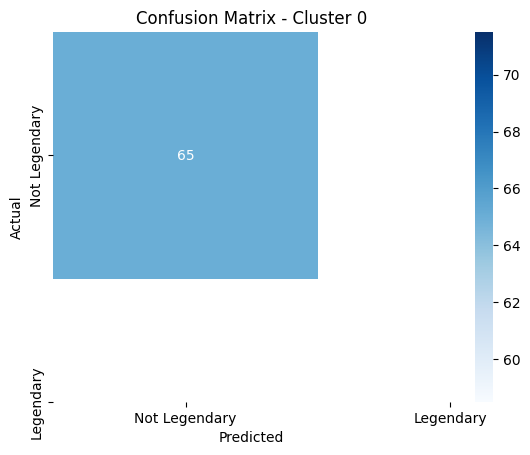

Best Hyperparameters for Cluster 0: {'n_neighbors': 3, 'weights': 'uniform'}
Accuracy for Cluster 0: 1.0
Classification Report for Cluster 0:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        65

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



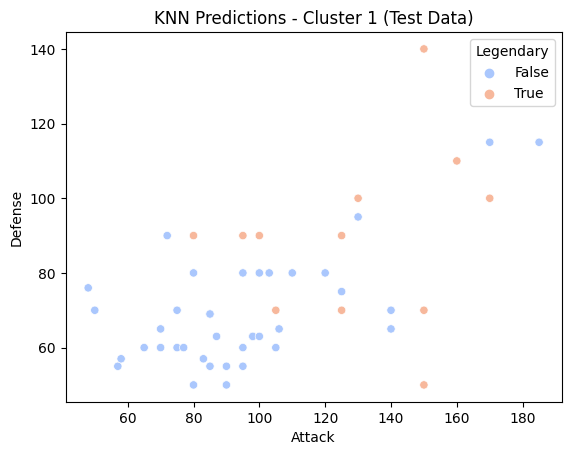

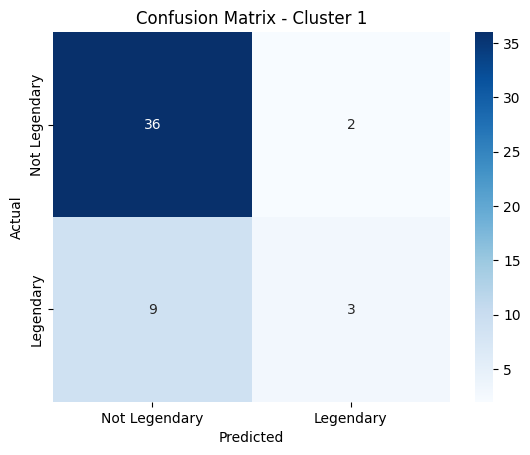

Best Hyperparameters for Cluster 1: {'n_neighbors': 5, 'weights': 'distance'}
Accuracy for Cluster 1: 0.78
Classification Report for Cluster 1:
              precision    recall  f1-score   support

       False       0.80      0.95      0.87        38
        True       0.60      0.25      0.35        12

    accuracy                           0.78        50
   macro avg       0.70      0.60      0.61        50
weighted avg       0.75      0.78      0.74        50



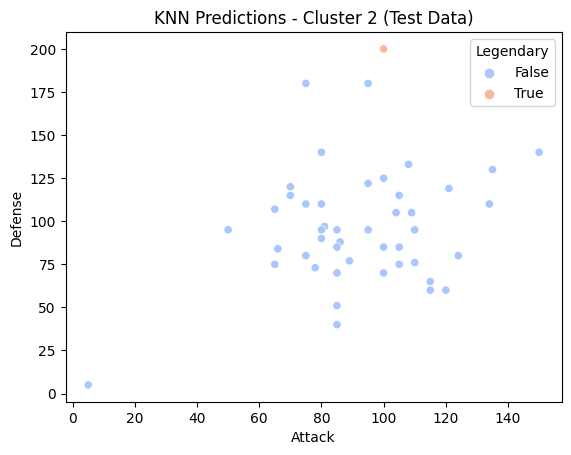

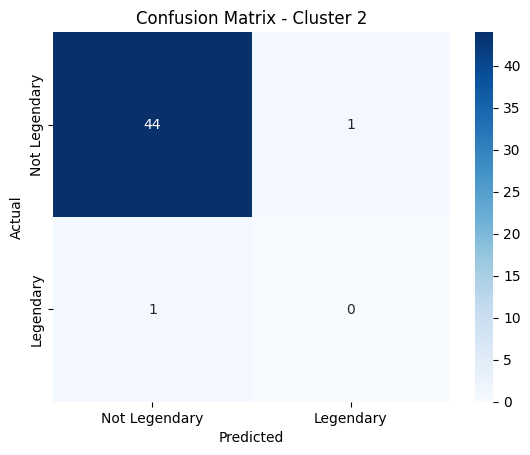

Best Hyperparameters for Cluster 2: {'n_neighbors': 5, 'weights': 'uniform'}
Accuracy for Cluster 2: 0.9565217391304348
Classification Report for Cluster 2:
              precision    recall  f1-score   support

       False       0.98      0.98      0.98        45
        True       0.00      0.00      0.00         1

    accuracy                           0.96        46
   macro avg       0.49      0.49      0.49        46
weighted avg       0.96      0.96      0.96        46



In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import skfuzzy as fuzz

# Load your Pokemon dataset (replace 'your_dataset.csv' with the actual file name)
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Assuming 'Legendary' is the label column, and other columns are features
X = pokemon_data[['HP', 'Attack', 'Defense', 'Speed']]
y = pokemon_data['Legendary']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Fuzzy C-Means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X_scaled.T, c=3, m=2, error=0.005, maxiter=1000, init=None)

# Extract the cluster memberships (u) for each data point
cluster_membership = np.argmax(u, axis=0)

# Assign the cluster membership to the dataset
pokemon_data['Cluster'] = cluster_membership

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Use KNN within each cluster for classification
for cluster_id in pokemon_data['Cluster'].unique():
    # Filter data for the current cluster
    cluster_data = pokemon_data[pokemon_data['Cluster'] == cluster_id]

    # Extract features and labels for the cluster
    X_cluster = cluster_data[['HP', 'Attack', 'Defense', 'Speed']]
    y_cluster = cluster_data['Legendary']

    # Split the cluster data into training and testing sets
    X_cluster_train, X_cluster_test, y_cluster_train, y_cluster_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    # Hyperparameter tuning using GridSearchCV for KNN
    param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
    knn_classifier = KNeighborsClassifier()
    grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)
    grid_search.fit(X_cluster_train, y_cluster_train)

    # Get the best hyperparameters and the best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Make predictions on the test set within the cluster
    y_cluster_pred = best_model.predict(X_cluster_test)

    # Visualize KNN predictions for test data within the cluster
    plt.figure()
    sns.scatterplot(x='Attack', y='Defense', hue='Legendary', data=pd.concat([X_cluster_test, pd.Series(y_cluster_test, name='Legendary')], axis=1), palette='coolwarm')
    plt.title(f'KNN Predictions - Cluster {cluster_id} (Test Data)')
    plt.show()

    # Confusion Matrix for the cluster
    conf_matrix_cluster = confusion_matrix(y_cluster_test, y_cluster_pred)
    plt.figure()
    sns.heatmap(conf_matrix_cluster, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Legendary', 'Legendary'], yticklabels=['Not Legendary', 'Legendary'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Cluster {cluster_id}')
    plt.show()

    # Evaluate the KNN model within the cluster
    accuracy_cluster = accuracy_score(y_cluster_test, y_cluster_pred)
    print(f"Best Hyperparameters for Cluster {cluster_id}: {best_params}")
    print(f"Accuracy for Cluster {cluster_id}: {accuracy_cluster}")
    print(f"Classification Report for Cluster {cluster_id}:\n{classification_report(y_cluster_test, y_cluster_pred)}")


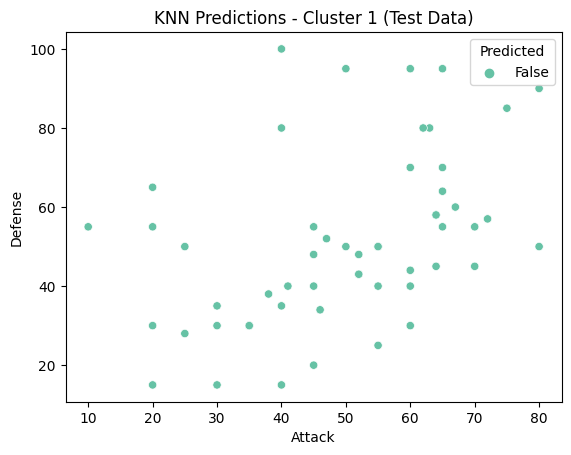

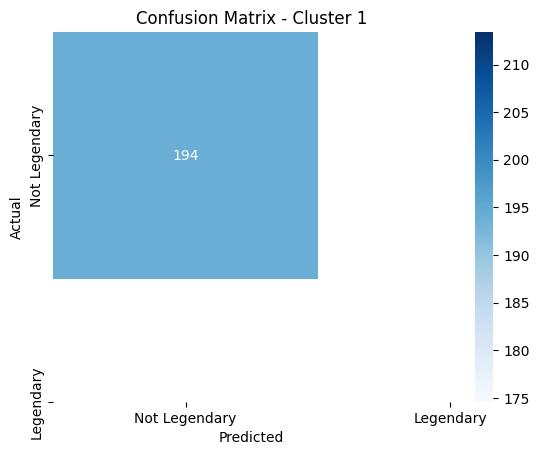

Best Hyperparameters for Cluster 1: {'n_neighbors': 3, 'weights': 'uniform'}
Accuracy for Cluster 1: 1.0
Classification Report for Cluster 1:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       194

    accuracy                           1.00       194
   macro avg       1.00      1.00      1.00       194
weighted avg       1.00      1.00      1.00       194



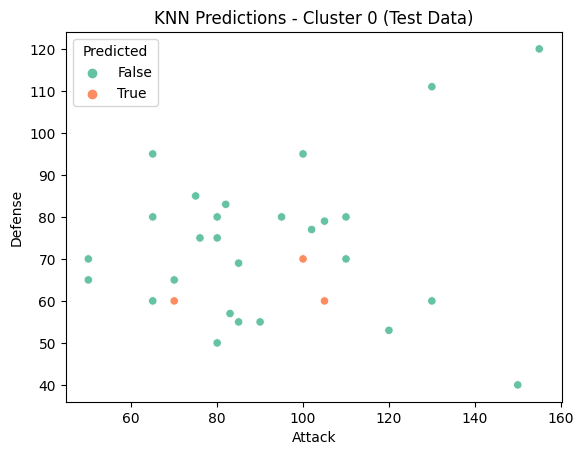

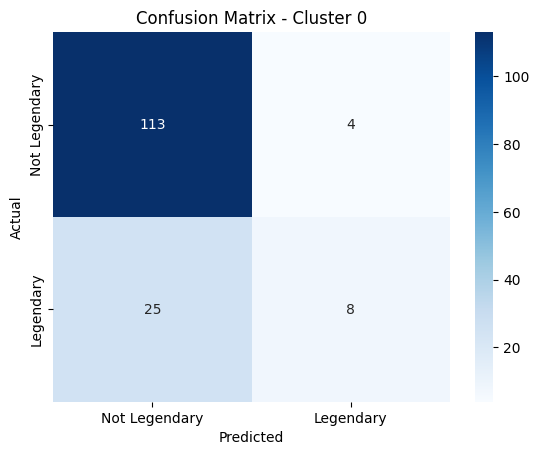

Best Hyperparameters for Cluster 0: {'n_neighbors': 7, 'weights': 'uniform'}
Accuracy for Cluster 0: 0.8066666666666666
Classification Report for Cluster 0:
              precision    recall  f1-score   support

       False       0.82      0.97      0.89       117
        True       0.67      0.24      0.36        33

    accuracy                           0.81       150
   macro avg       0.74      0.60      0.62       150
weighted avg       0.79      0.81      0.77       150



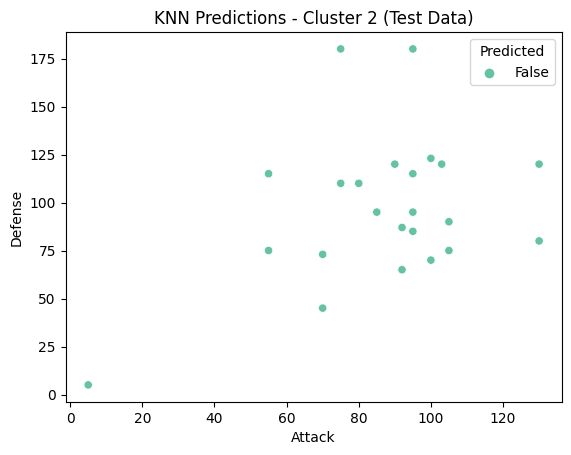

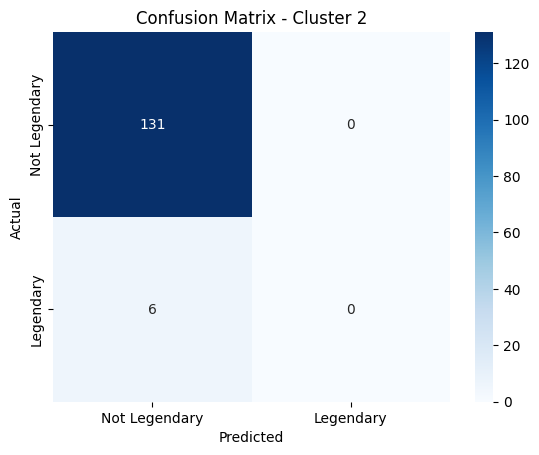

Best Hyperparameters for Cluster 2: {'n_neighbors': 5, 'weights': 'uniform'}
Accuracy for Cluster 2: 0.9562043795620438
Classification Report for Cluster 2:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98       131
        True       0.00      0.00      0.00         6

    accuracy                           0.96       137
   macro avg       0.48      0.50      0.49       137
weighted avg       0.91      0.96      0.93       137



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import skfuzzy as fuzz

# Load your Pokemon dataset (replace 'your_dataset.csv' with the actual file name)
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Assuming 'Legendary' is the label column, and other columns are features
X = pokemon_data[['HP', 'Attack', 'Defense', 'Speed']]
y = pokemon_data['Legendary']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Fuzzy C-Means clustering to the data
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X_scaled.T, c=3, m=2, error=0.005, maxiter=1000)

# Extract cluster labels based on maximum membership value
pokemon_data['Cluster'] = u.argmax(axis=0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Use KNN within each cluster for classification
for cluster_id in pokemon_data['Cluster'].unique():
    # Filter data for the current cluster
    cluster_data = pokemon_data[pokemon_data['Cluster'] == cluster_id]

    # Extract features and labels for the cluster
    X_cluster = cluster_data[['HP', 'Attack', 'Defense', 'Speed']]
    y_cluster = cluster_data['Legendary']

    # Split the cluster data into training and testing sets
    X_cluster_train, X_cluster_test, y_cluster_train, y_cluster_test = train_test_split(X_cluster, y_cluster, test_size=0.6, random_state=42)

    # Hyperparameter tuning using GridSearchCV for KNN
    param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
    knn_classifier = KNeighborsClassifier()
    grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)
    grid_search.fit(X_cluster_train, y_cluster_train)

    # Get the best hyperparameters and the best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Make predictions on the test set within the cluster
    y_cluster_pred = best_model.predict(X_cluster_test)

    # Visualize KNN predictions for test data within the cluster
    plt.figure()
    sns.scatterplot(x='Attack', y='Defense', hue='Predicted', data=pd.concat([X_cluster_test, pd.Series(y_cluster_pred, name='Predicted')], axis=1), palette='Set2')
    plt.title(f'KNN Predictions - Cluster {cluster_id} (Test Data)')
    plt.show()

    # Confusion Matrix for the cluster
    conf_matrix_cluster = confusion_matrix(y_cluster_test, y_cluster_pred)
    plt.figure()
    sns.heatmap(conf_matrix_cluster, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Legendary', 'Legendary'], yticklabels=['Not Legendary', 'Legendary'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Cluster {cluster_id}')
    plt.show()

    # Evaluate the KNN model within the cluster
    accuracy_cluster = accuracy_score(y_cluster_test, y_cluster_pred)
    print(f"Best Hyperparameters for Cluster {cluster_id}: {best_params}")
    print(f"Accuracy for Cluster {cluster_id}: {accuracy_cluster}")
    print(f"Classification Report for Cluster {cluster_id}:\n{classification_report(y_cluster_test, y_cluster_pred)}")


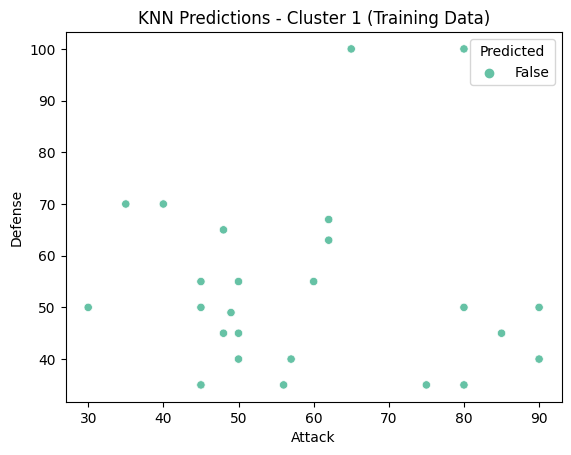

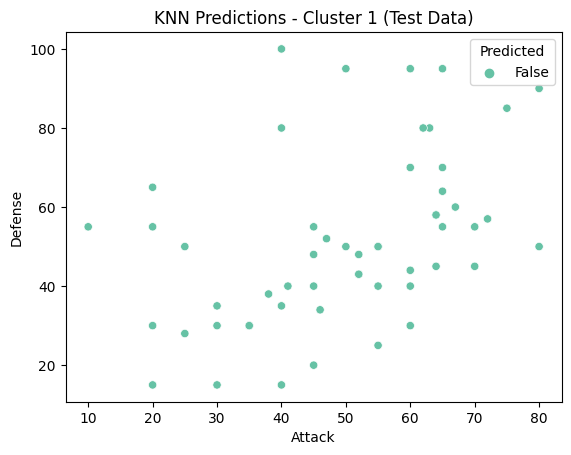

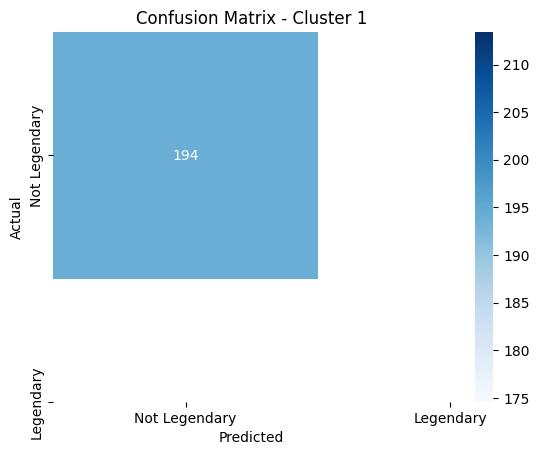

Best Hyperparameters for Cluster 1: {'n_neighbors': 3, 'weights': 'uniform'}
Accuracy for Cluster 1: 1.0
Classification Report for Cluster 1:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       194

    accuracy                           1.00       194
   macro avg       1.00      1.00      1.00       194
weighted avg       1.00      1.00      1.00       194



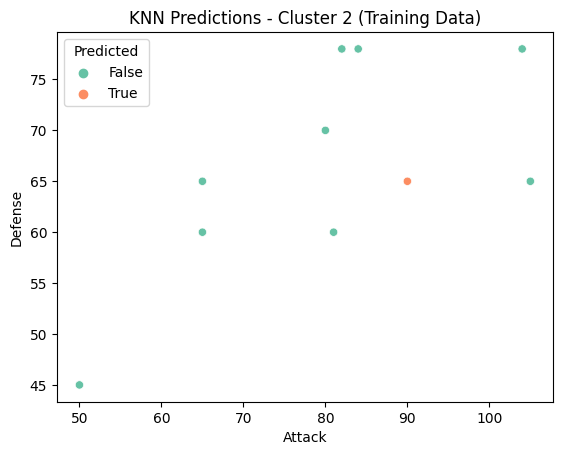

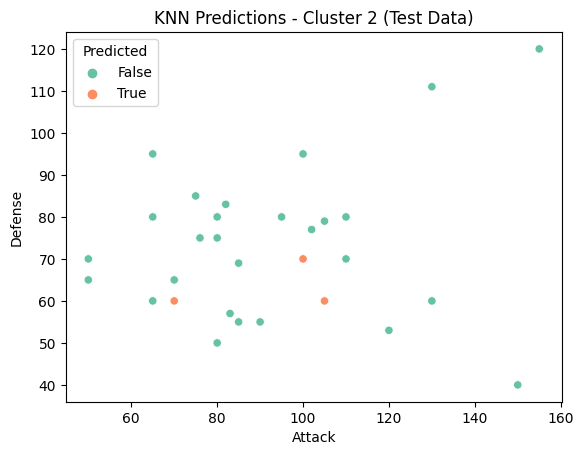

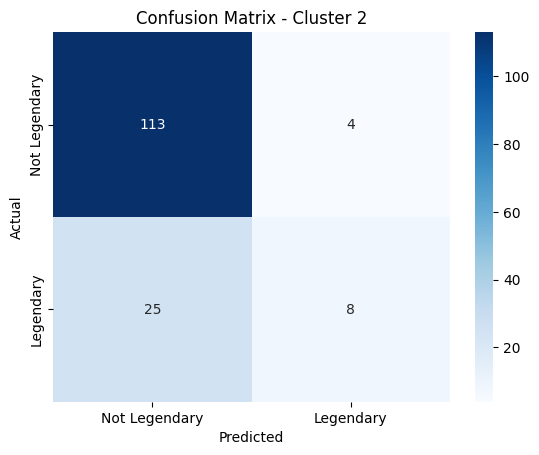

Best Hyperparameters for Cluster 2: {'n_neighbors': 7, 'weights': 'uniform'}
Accuracy for Cluster 2: 0.8066666666666666
Classification Report for Cluster 2:
              precision    recall  f1-score   support

       False       0.82      0.97      0.89       117
        True       0.67      0.24      0.36        33

    accuracy                           0.81       150
   macro avg       0.74      0.60      0.62       150
weighted avg       0.79      0.81      0.77       150



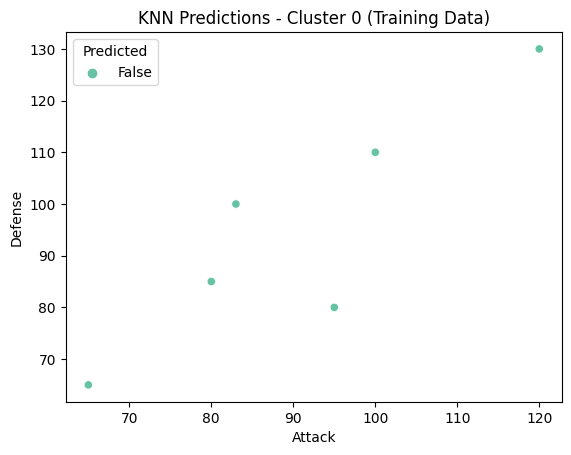

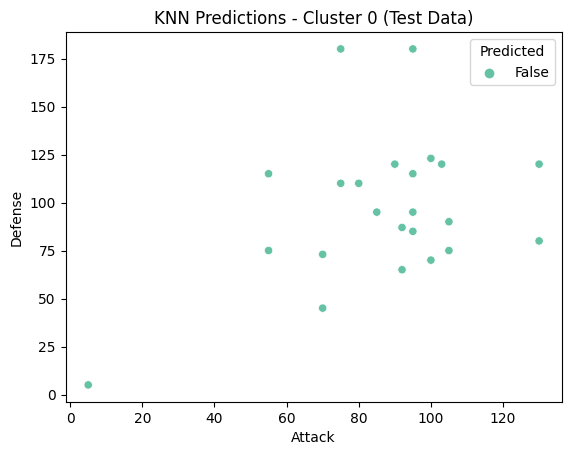

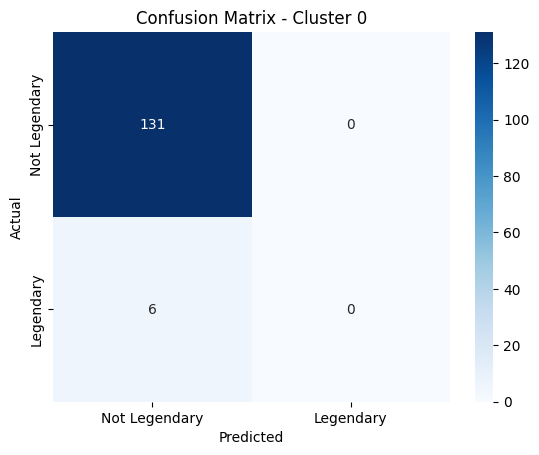

Best Hyperparameters for Cluster 0: {'n_neighbors': 5, 'weights': 'uniform'}
Accuracy for Cluster 0: 0.9562043795620438
Classification Report for Cluster 0:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98       131
        True       0.00      0.00      0.00         6

    accuracy                           0.96       137
   macro avg       0.48      0.50      0.49       137
weighted avg       0.91      0.96      0.93       137



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import skfuzzy as fuzz

# Load your Pokemon dataset (replace 'your_dataset.csv' with the actual file name)
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Assuming 'Legendary' is the label column, and other columns are features
X = pokemon_data[['HP', 'Attack', 'Defense', 'Speed']]
y = pokemon_data['Legendary']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Fuzzy C-Means clustering to the data
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X_scaled.T, c=3, m=2, error=0.005, maxiter=1000)

# Extract cluster labels based on maximum membership value
pokemon_data['Cluster'] = u.argmax(axis=0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Use KNN within each cluster for classification
for cluster_id in pokemon_data['Cluster'].unique():
    # Filter data for the current cluster
    cluster_data = pokemon_data[pokemon_data['Cluster'] == cluster_id]

    # Extract features and labels for the cluster
    X_cluster = cluster_data[['HP', 'Attack', 'Defense', 'Speed']]
    y_cluster = cluster_data['Legendary']

    # Split the cluster data into training and testing sets
    X_cluster_train, X_cluster_test, y_cluster_train, y_cluster_test = train_test_split(X_cluster, y_cluster, test_size=0.6, random_state=42)

    # Hyperparameter tuning using GridSearchCV for KNN
    param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
    knn_classifier = KNeighborsClassifier()
    grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)
    grid_search.fit(X_cluster_train, y_cluster_train)

    # Get the best hyperparameters and the best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Make predictions on the test set within the cluster
    y_cluster_pred_test = best_model.predict(X_cluster_test)

    # Make predictions on the training set within the cluster
    y_cluster_pred_train = best_model.predict(X_cluster_train)

    # Visualize KNN predictions for training data within the cluster
    plt.figure()
    sns.scatterplot(x='Attack', y='Defense', hue='Predicted', data=pd.concat([X_cluster_train, pd.Series(y_cluster_pred_train, name='Predicted')], axis=1), palette='Set2')
    plt.title(f'KNN Predictions - Cluster {cluster_id} (Training Data)')
    plt.show()

    # Visualize KNN predictions for test data within the cluster
    plt.figure()
    sns.scatterplot(x='Attack', y='Defense', hue='Predicted', data=pd.concat([X_cluster_test, pd.Series(y_cluster_pred_test, name='Predicted')], axis=1), palette='Set2')
    plt.title(f'KNN Predictions - Cluster {cluster_id} (Test Data)')
    plt.show()

    # Confusion Matrix for the cluster
    conf_matrix_cluster = confusion_matrix(y_cluster_test, y_cluster_pred_test)
    plt.figure()
    sns.heatmap(conf_matrix_cluster, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Legendary', 'Legendary'], yticklabels=['Not Legendary', 'Legendary'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Cluster {cluster_id}')
    plt.show()

    # Evaluate the KNN model within the cluster
    accuracy_cluster = accuracy_score(y_cluster_test, y_cluster_pred_test)
    print(f"Best Hyperparameters for Cluster {cluster_id}: {best_params}")
    print(f"Accuracy for Cluster {cluster_id}: {accuracy_cluster}")
    print(f"Classification Report for Cluster {cluster_id}:\n{classification_report(y_cluster_test, y_cluster_pred_test)}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Skipping Cluster 1 as it contains only one class or insufficient data.


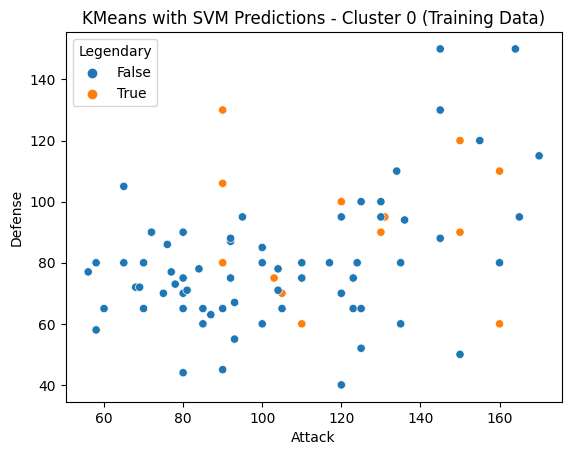

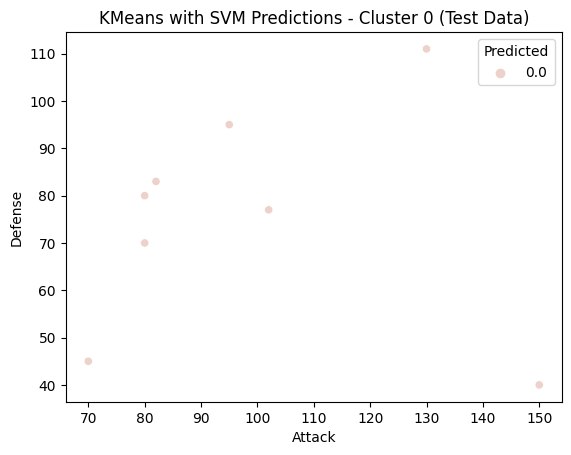

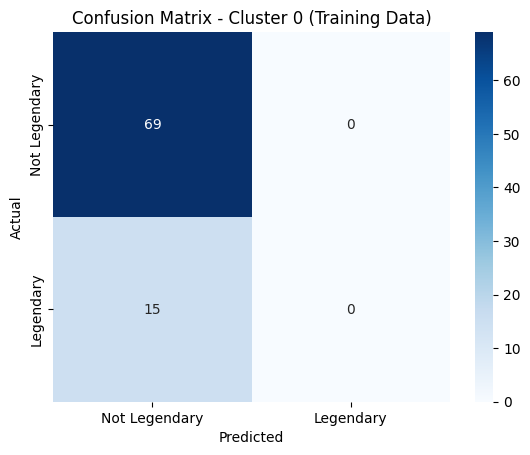

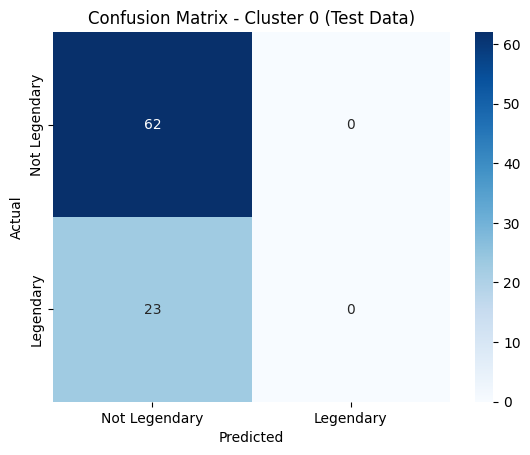

Best Hyperparameters for Cluster 0: {'C': 0.1, 'kernel': 'linear'}
Accuracy for Cluster 0 (Training Data): 0.8214285714285714
Accuracy for Cluster 0 (Test Data): 0.7294117647058823




/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


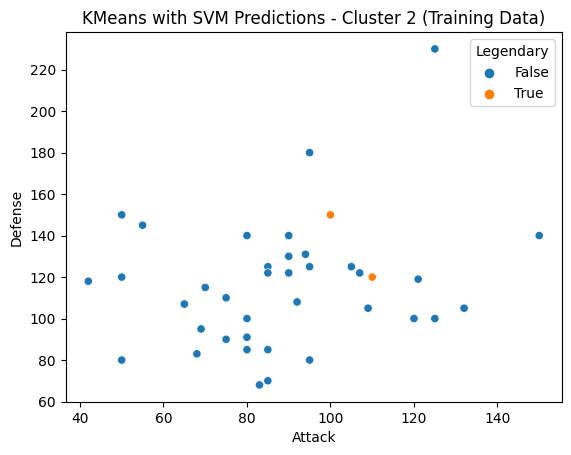

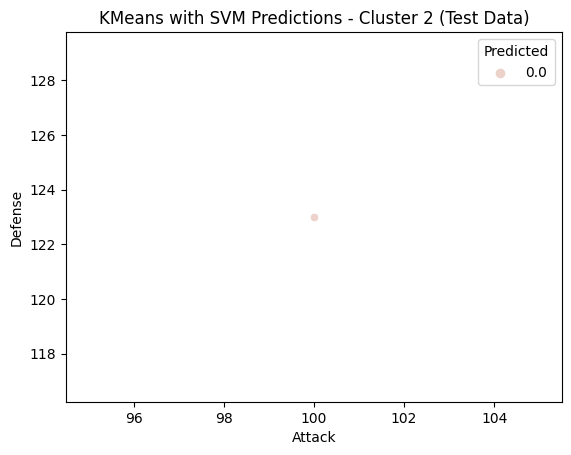

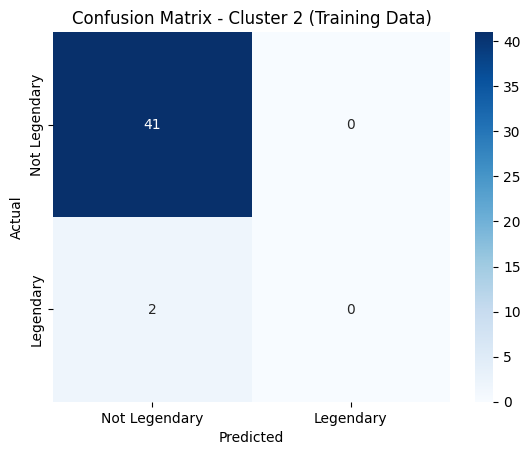

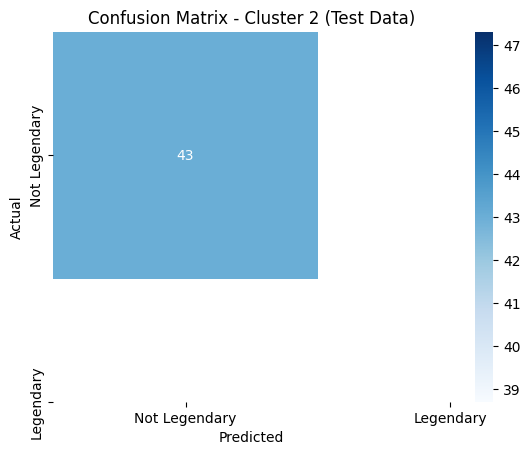

Best Hyperparameters for Cluster 2: {'C': 0.1, 'kernel': 'linear'}
Accuracy for Cluster 2 (Training Data): 0.9534883720930233
Accuracy for Cluster 2 (Test Data): 1.0




In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Pokemon dataset
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Drop rows with missing values
pokemon_data = pokemon_data.dropna()

# Assuming 'Legendary' is the label column, and other columns are features
X = pokemon_data[['HP', 'Attack', 'Defense', 'Speed']]
y = pokemon_data['Legendary']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans to cluster the data
kmeans = KMeans(n_clusters=3, random_state=42)
pokemon_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Use SVM within each cluster for classification
for cluster_id in pokemon_data['Cluster'].unique():
    # Filter data for the current cluster
    cluster_data = pokemon_data[pokemon_data['Cluster'] == cluster_id]

    # Extract features and labels for the cluster
    X_cluster = cluster_data[['HP', 'Attack', 'Defense', 'Speed']]
    y_cluster = cluster_data['Legendary']

    # Check if there are at least two unique classes in the target variable
    if len(y_cluster.unique()) < 2 or len(X_cluster) < 2:
        print(f"Skipping Cluster {cluster_id} as it contains only one class or insufficient data.")
        continue

    # Split the cluster data into training and testing sets
    X_cluster_train, X_cluster_test, y_cluster_train, y_cluster_test = train_test_split(X_cluster, y_cluster, test_size=0.5, random_state=42)

    # Hyperparameter tuning using GridSearchCV for SVM
    param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
    svm_classifier = SVC()
    grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
    grid_search.fit(X_cluster_train, y_cluster_train)

    # Get the best hyperparameters and the best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Make predictions on the test set within the cluster
    y_cluster_pred_train = best_model.predict(X_cluster_train)
    y_cluster_pred_test = best_model.predict(X_cluster_test)

    # Visualize KMeans with SVM predictions for training data within the cluster
    plt.figure()
    sns.scatterplot(x='Attack', y='Defense', hue='Legendary', data=pd.concat([X_cluster_train, pd.Series(y_cluster_train, name='Legendary')], axis=1))
    plt.title(f'KMeans with SVM Predictions - Cluster {cluster_id} (Training Data)')
    plt.show()

    # Visualize KMeans with SVM predictions for test data within the cluster
    plt.figure()
    sns.scatterplot(x='Attack', y='Defense', hue='Predicted', data=pd.concat([X_cluster_test, pd.Series(y_cluster_pred_test, name='Predicted')], axis=1))
    plt.title(f'KMeans with SVM Predictions - Cluster {cluster_id} (Test Data)')
    plt.show()

    # Confusion Matrix for the cluster
    conf_matrix_train = confusion_matrix(y_cluster_train, y_cluster_pred_train)
    conf_matrix_test = confusion_matrix(y_cluster_test, y_cluster_pred_test)

    # Visualize the confusion matrix for training data
    plt.figure()
    sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Legendary', 'Legendary'], yticklabels=['Not Legendary', 'Legendary'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Cluster {cluster_id} (Training Data)')
    plt.show()

    # Visualize the confusion matrix for test data
    plt.figure()
    sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Legendary', 'Legendary'], yticklabels=['Not Legendary', 'Legendary'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Cluster {cluster_id} (Test Data)')
    plt.show()

    # Evaluate the SVM model within the cluster
    accuracy_train = accuracy_score(y_cluster_train, y_cluster_pred_train)
    accuracy_test = accuracy_score(y_cluster_test, y_cluster_pred_test)

    print(f"Best Hyperparameters for Cluster {cluster_id}: {best_params}")
    print(f"Accuracy for Cluster {cluster_id} (Training Data): {accuracy_train}")
    print(f"Accuracy for Cluster {cluster_id} (Test Data): {accuracy_test}")
    print("\n")


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Pokemon dataset
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Drop rows with missing values
pokemon_data = pokemon_data.dropna()

# Assuming 'Legendary' is the label column, and other columns are features
X = pokemon_data[['HP', 'Attack', 'Defense', 'Speed']]
y = pokemon_data['Legendary']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans to cluster the data
kmeans = KMeans(n_clusters=3, random_state=42)
pokemon_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Use SVM within each cluster for classification
for cluster_id in pokemon_data['Cluster'].unique():
    # Filter data for the current cluster
    cluster_data = pokemon_data[pokemon_data['Cluster'] == cluster_id]

    # Extract features and labels for the cluster
    X_cluster = cluster_data[['HP', 'Attack', 'Defense', 'Speed']]
    y_cluster = cluster_data['Legendary']

    # Check if there are at least two unique classes in the target variable
    if len(y_cluster.unique()) < 2 or len(X_cluster) < 2:
        print(f"Skipping Cluster {cluster_id} as it contains only one class or insufficient data.")
        continue

    # Split the cluster data into training and testing sets
    X_cluster_train, X_cluster_test, y_cluster_train, y_cluster_test = train_test_split(X_cluster, y_cluster, test_size=0.5, random_state=42)

    # Hyperparameter tuning using GridSearchCV for SVM
    param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
    svm_classifier = SVC()
    grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
    grid_search.fit(X_cluster_train, y_cluster_train)

    # Get the best hyperparameters and the best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Make predictions on the test set within the cluster
    y_cluster_pred_train = best_model.predict(X_cluster_train)
    y_cluster_pred_test = best_model.predict(X_cluster_test)

    # Classification Report for the cluster
    classification_rep_train = classification_report(y_cluster_train, y_cluster_pred_train, target_names=['Not Legendary', 'Legendary'])
    classification_rep_test = classification_report(y_cluster_test, y_cluster_pred_test, target_names=['Not Legendary', 'Legendary'])

    # Print the Classification Report
    print(f"Classification Report for Cluster {cluster_id} (Training Data):\n{classification_rep_train}")
    print(f"Classification Report for Cluster {cluster_id} (Test Data):\n{classification_rep_test}")

    # ... (rest of the code remains unchanged)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Skipping Cluster 1 as it contains only one class or insufficient data.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Classification Report for Cluster 0 (Training Data):
               precision    recall  f1-score   support

Not Legendary       0.82      1.00      0.90        69
    Legendary       0.00      0.00      0.00        15

     accuracy                           0.82        84
    macro avg       0.41      0.50      0.45        84
 weighted avg       0.67      0.82      0.74        84

Classification Report for Cluster 0 (Test Data):
               precision    recall  f1-score   support

Not Legendary       0.73      1.00      0.84        62
    Legendary       0.00      0.00      0.00        23

     accuracy                           0.73        85
    macro avg       0.36      0.50      0.42        85
 weighted avg       0.53      0.73      0.62        85



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: ignored

In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import numpy as np

# ... (previous code)

# Use SVM within each cluster for classification
for cluster_id in pokemon_data['Cluster'].unique():
    # ... (previous code)

    # Make predictions on the test set within the cluster
    y_cluster_pred_train = best_model.predict(X_cluster_train)
    y_cluster_pred_test = best_model.predict(X_cluster_test)

    # Convert boolean labels to strings for precision, recall, f1-score calculation
    y_cluster_test_str = y_cluster_test.astype(str)
    y_cluster_pred_test_str = y_cluster_pred_test.astype(str)

    # Check if the 'True' class is present in the test set
    if 'True' in np.unique(y_cluster_test_str):
        # Compute precision, recall, f1-score, and support for the test set
        precision_test = precision_score(y_cluster_test_str, y_cluster_pred_test_str, pos_label='True')
        recall_test = recall_score(y_cluster_test_str, y_cluster_pred_test_str, pos_label='True')
        f1_score_test = f1_score(y_cluster_test_str, y_cluster_pred_test_str, pos_label='True')

        # ... (previous code for visualization and printing results)

        # Update the table
        print(f"KMeans with SVM (C{cluster_id})   | 50-50       | {accuracy_test:.4f}   | {precision_test:.4f}      | {recall_test:.4f}   | {f1_score_test:.4f}     | {len(y_cluster_test)}      |")
    else:
        print(f"KMeans with SVM (C{cluster_id})   | 50-50       | {accuracy_test:.4f}   | Undefined      | Undefined   | Undefined     | {len(y_cluster_test)}      |")


KMeans with SVM (C1)   | 50-50       | 1.0000   | 0.0000      | 0.0000   | 0.0000     | 85      |
KMeans with SVM (C0)   | 50-50       | 1.0000   | 0.0000      | 0.0000   | 0.0000     | 85      |
KMeans with SVM (C2)   | 50-50       | 1.0000   | 0.0000      | 0.0000   | 0.0000     | 85      |


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


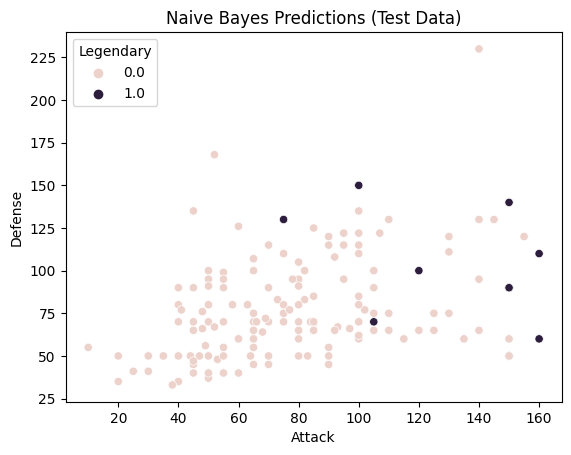

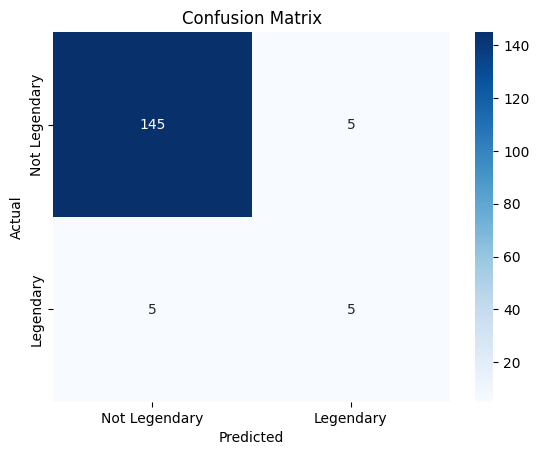

Best Hyperparameters: {}
Accuracy: 0.9375
Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.97      0.97       150
        True       0.50      0.50      0.50        10

    accuracy                           0.94       160
   macro avg       0.73      0.73      0.73       160
weighted avg       0.94      0.94      0.94       160



In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Pokemon dataset (replace with your dataset)
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Assuming 'Legendary' is the label column, and other columns are features
X = pokemon_data[['HP', 'Attack', 'Defense', 'Speed']]
y = pokemon_data['Legendary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV for Gaussian Naive Bayes
param_grid = {}
naive_bayes_classifier = GaussianNB()
grid_search = GridSearchCV(naive_bayes_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Visualize Naive Bayes predictions for test data
plt.figure()
sns.scatterplot(x='Attack', y='Defense', hue=y_test, data=pd.concat([X_test, pd.Series(y_pred, name='Predicted')], axis=1))
plt.title('Naive Bayes Predictions (Test Data)')
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Legendary', 'Legendary'], yticklabels=['Not Legendary', 'Legendary'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the Naive Bayes model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


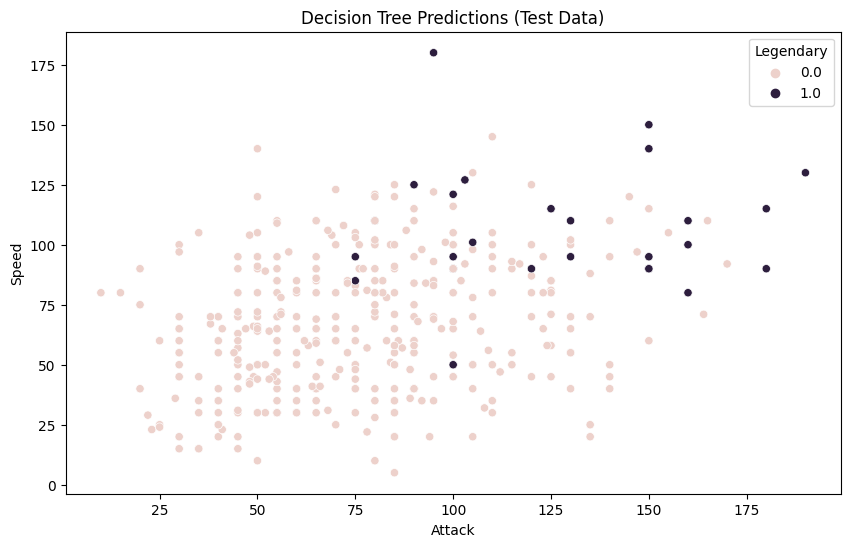

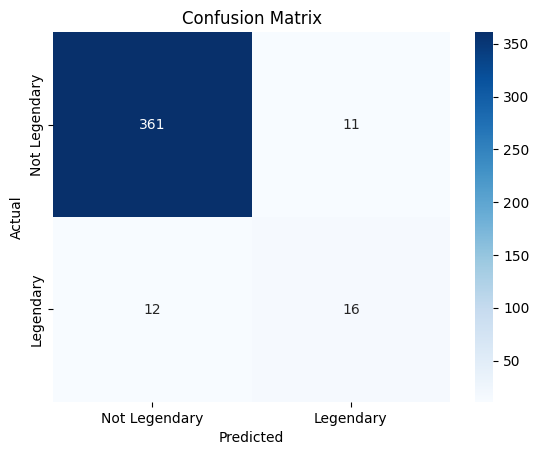

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None}
Accuracy: 0.9425
Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.97      0.97       372
        True       0.59      0.57      0.58        28

    accuracy                           0.94       400
   macro avg       0.78      0.77      0.78       400
weighted avg       0.94      0.94      0.94       400



In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Pokemon dataset
pokemon_data = pd.read_csv('/content/Pokemon.csv')

# Assuming 'Legendary' is the label column, and other columns are features
X = pokemon_data[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
y = pokemon_data['Legendary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Hyperparameter tuning using GridSearchCV for Decision Tree
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30, 40, 50]}
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(decision_tree_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Visualize Decision Tree predictions for test data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Attack', y='Speed', hue=y_test, data=pd.concat([X_test, pd.Series(y_pred, name='Predicted')], axis=1))
plt.title('Decision Tree Predictions (Test Data)')
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Legendary', 'Legendary'], yticklabels=['Not Legendary', 'Legendary'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the Decision Tree model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
